<a href="https://colab.research.google.com/github/23151009-lab/Assignment-1/blob/main/Truong_Hien_Dat_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
uploaded = files.upload()

Saving Screenshot 2025-11-13 191649.png to Screenshot 2025-11-13 191649.png


**READ IMAGE (img)**

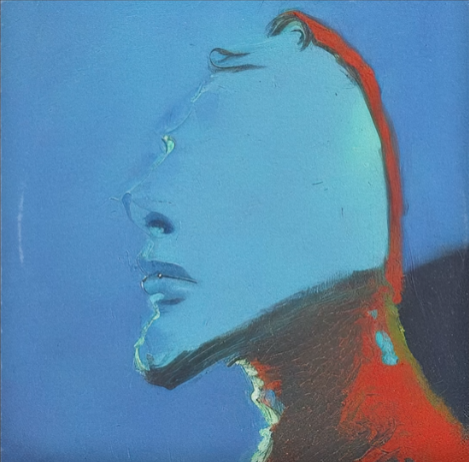

In [ ]:
#Read image
img = cv.imread('Assignment1.png') #BGR

#Show image
cv2_imshow(img)

**EXTRACT IMAGE AND SHOW RGB IN THE SAME FIGURE**

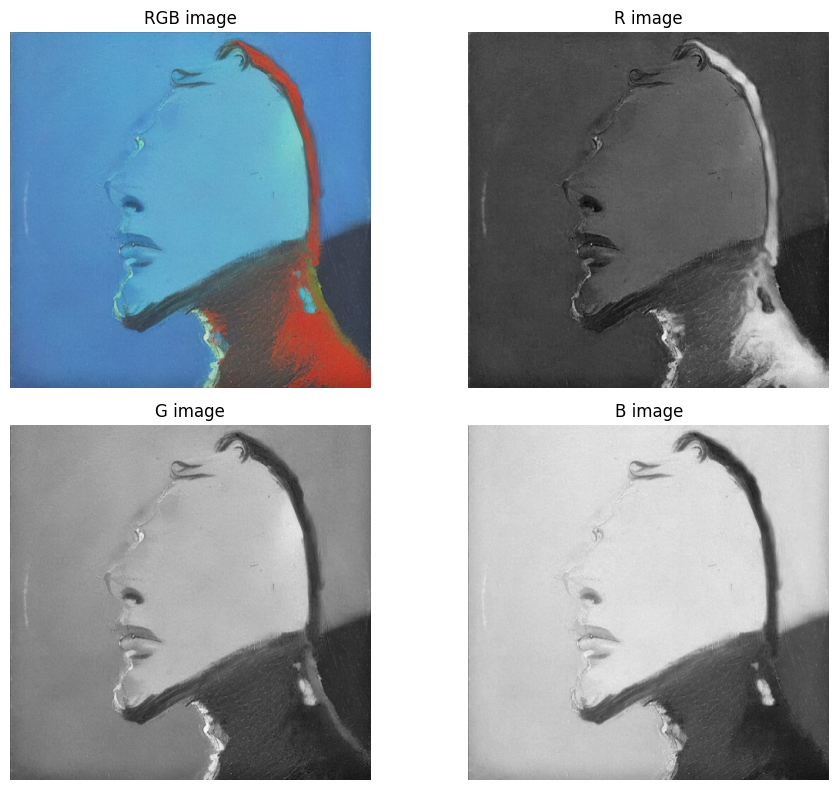

In [ ]:
# Extract BGR channels
b = img[:, :, 0]
g = img[:, :, 1]
r = img[:, :, 2]

# Create a figure
plt.figure(figsize=(10, 8))

# Add origin
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # Convert from BGR (opencv) to RGB (matplot)
plt.title('RGB image')
plt.axis('off')

# Red channel
plt.subplot(2, 2, 2)
plt.imshow(r, cmap='gray')
plt.title('R image')
plt.axis('off')

# Green channel
plt.subplot(2, 2, 3)
plt.imshow(g, cmap='gray')
plt.title('G image')
plt.axis('off')

# Blue channel
plt.subplot(2, 2, 4)
plt.imshow(b, cmap='gray')
plt.title('B image')
plt.axis('off')

plt.tight_layout()
plt.show()


**CROP IMAGE**

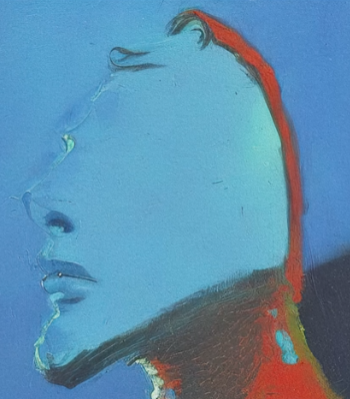

In [ ]:
img=cv.imread('Assignment1.png')

cropped = img[1:400, 100:450]

cv2_imshow(cropped)

**FIND THE MAXIMUM VALUE AND INDEX OF MAX VALUE OF PIXEL**

In [ ]:
img = cv.imread('Assignment1.png')

# Split into channels
b, g, r = cv.split(img)

# Find maximum values
max_b = np.max(b)
max_g = np.max(g)
max_r = np.max(r)

# Find indexes (y, x) of those max values
y_b, x_b = np.unravel_index(np.argmax(b), b.shape)
y_g, x_g = np.unravel_index(np.argmax(g), g.shape)
y_r, x_r = np.unravel_index(np.argmax(r), r.shape)

print(f"Blue channel:  max={max_b} at (x={x_b}, y={y_b})")
print(f"Green channel: max={max_g} at (x={x_g}, y={y_g})")
print(f"Red channel:   max={max_r} at (x={x_r}, y={y_r})")


Blue channel:  max=234 at (x=142, y=285)
Green channel: max=229 at (x=253, y=394)
Red channel:   max=215 at (x=256, y=397)


**FIND THE MINIMUM VALUE AND INDEX OF MIN VALUE OF PIXEL**

In [ ]:
img = cv.imread('Assignment1.png')

# Split into channels
b, g, r = cv.split(img)

# Find maximum values
min_b = np.min(b)
min_g = np.min(g)
min_r = np.min(r)

# Find indexes (y, x) of max values
y_b, x_b = np.unravel_index(np.argmin(b), b.shape)
y_g, x_g = np.unravel_index(np.argmin(g), g.shape)
y_r, x_r = np.unravel_index(np.argmin(r), r.shape)

print(f"Blue channel:  min={max_b} at (x={x_b}, y={y_b})")
print(f"Green channel: min={max_g} at (x={x_g}, y={y_g})")
print(f"Red channel:   min={max_r} at (x={x_r}, y={y_r})")


Blue channel:  min=14 at (x=461, y=458)
Green channel: min=29 at (x=461, y=458)
Red channel:   min=34 at (x=165, y=229)


**INCREASE THE INTENSITY LINEAR OF THE IMAGE**

How much do you want to change the image intensity (0-255): 0.5


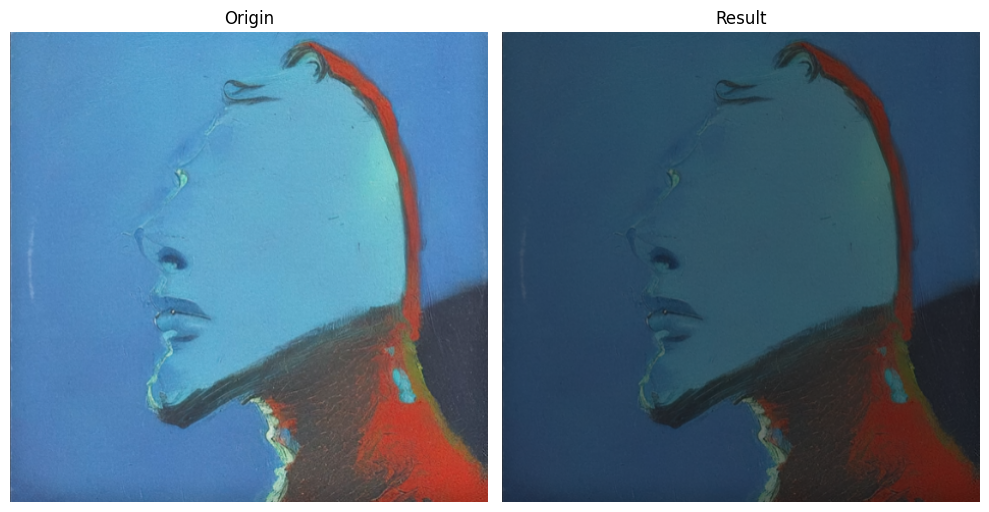

In [ ]:
img = cv.imread('Assignment1.png')

# Input alpha
alpha = float(input("How much do you want to change the image intensity (0-255): "))

# Apply linear scaling
output = np.clip(img * alpha, 0, 255).astype(np.uint8)

# Result
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) # Convert from BGR (opencv) to RGB (matplot)
plt.title('Origin')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title('Result')
plt.axis('off')

plt.tight_layout()
plt.show()


**Subtract two images/find the difference of two images (without alignment)**

In [ ]:
uploaded = files.upload()
img1 = cv.imread('image1.png')
img2 = cv.imread('image2.png')

Saving image1.png to image1.png
Saving image2.png to image2.png


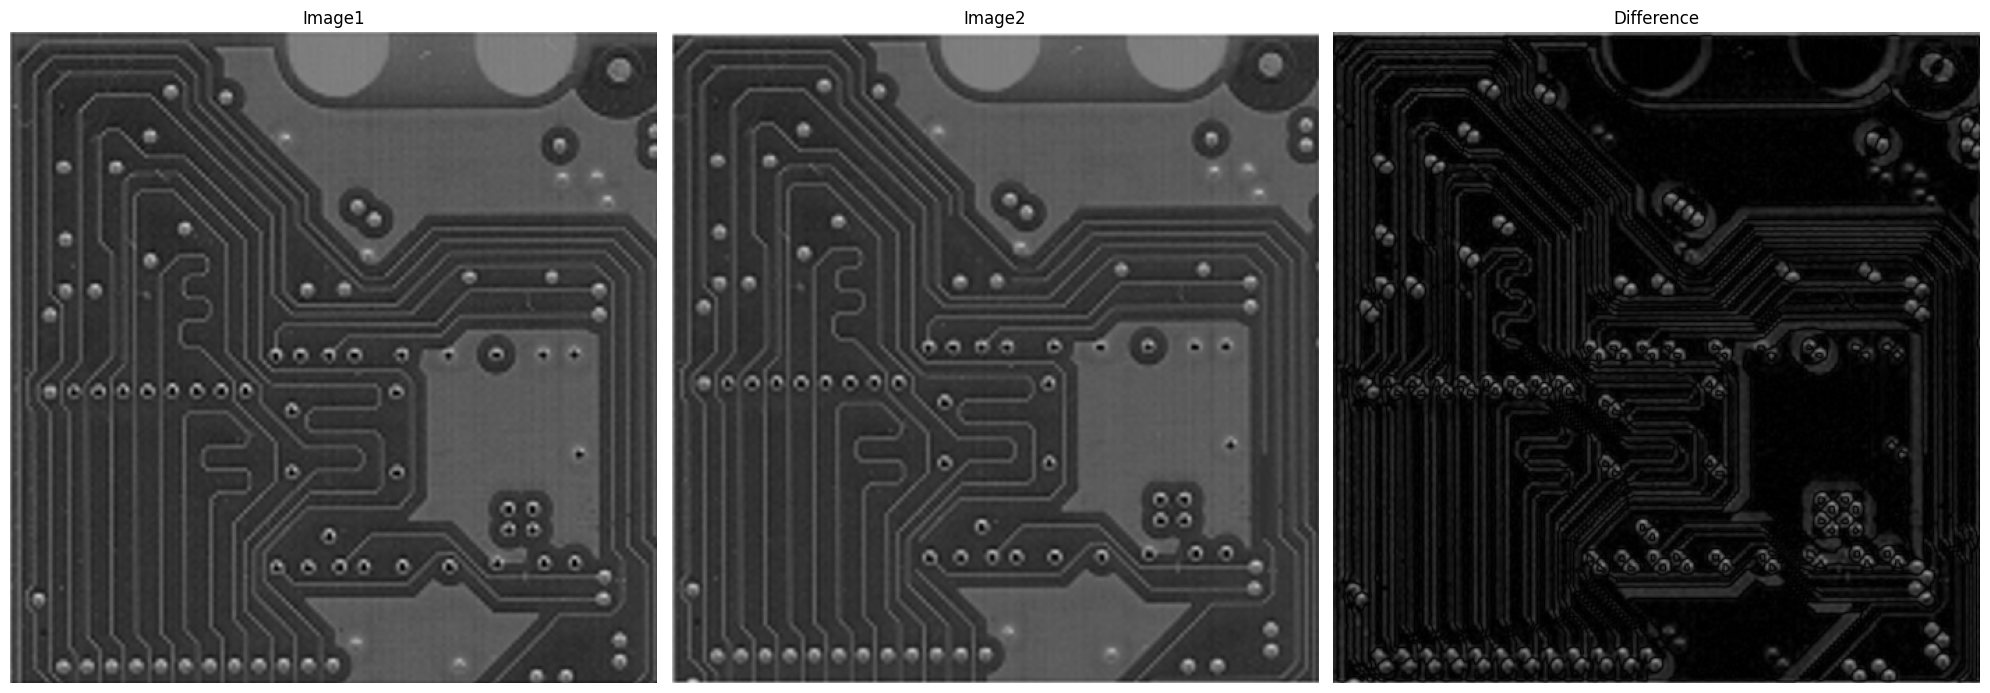

In [ ]:
# Resize img2 to match img1
img2 = cv.resize(img2, (img1.shape[1], img1.shape[0]))

# Compute absolute difference
diff = cv.absdiff(img1, img2)

plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.title('Image1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.title('Image2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(diff)
plt.title('Difference')
plt.axis('off')

plt.tight_layout()
plt.show()

**Subtract two images/find the difference of two images (**with** alignment)**

In [ ]:
uploaded = files.upload()
img1 = cv.imread('image1.png')
img2 = cv.imread('image2.png')

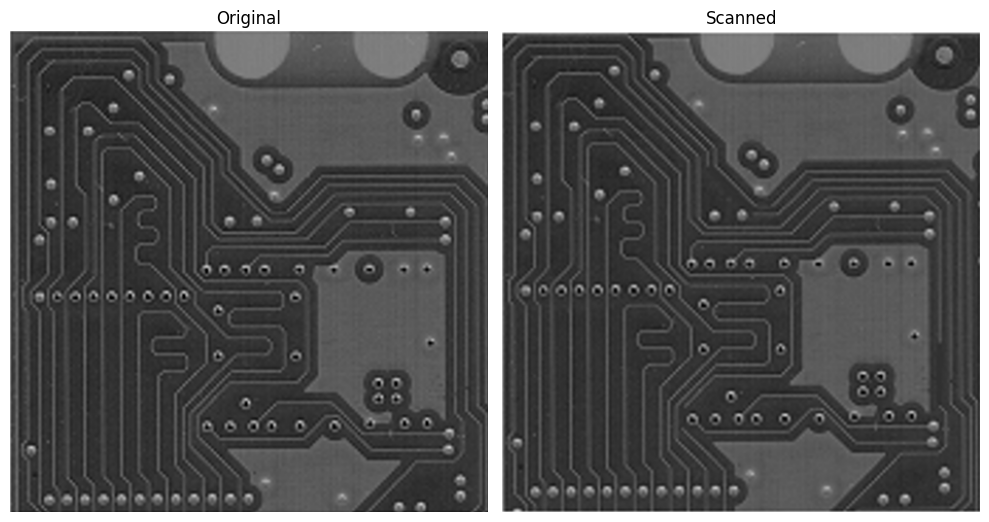

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Scanned')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Convert images to grayscale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Create ORB detector
MAX_NUM_FEATURES=5000
orb = cv.ORB_create(MAX_NUM_FEATURES)

# Find keypoints and descriptors
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Display
im1_display = cv.drawKeypoints(img1, kp1, outImage=np.array([]), color=(0, 255, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv.drawKeypoints(img2, kp2, outImage=np.array([]), color=(0, 255, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

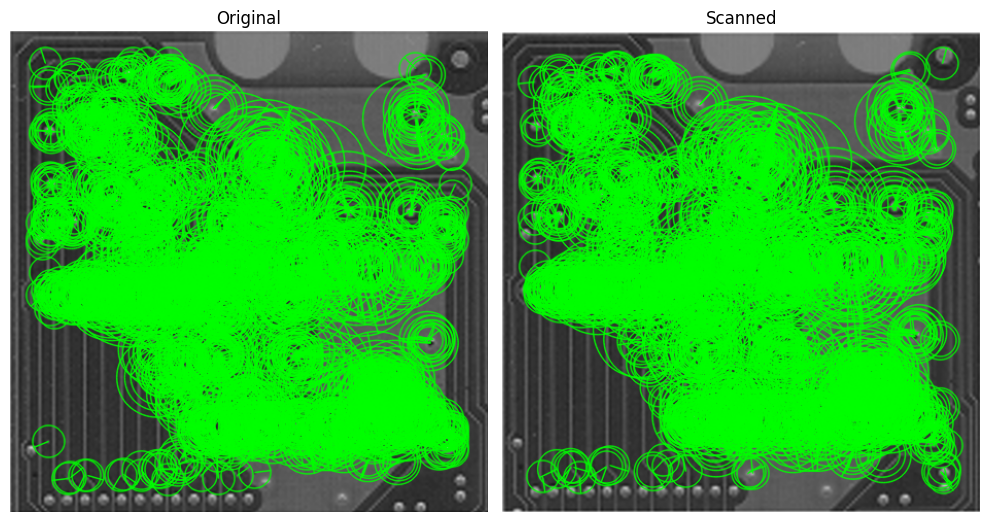

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.imshow(im1_display)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(im2_display)
plt.title('Scanned')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Match features
matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(des1, des2)

# Sort matches by scores
matches = list(matches) #ensure a list, prevent 'tuple' error
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]


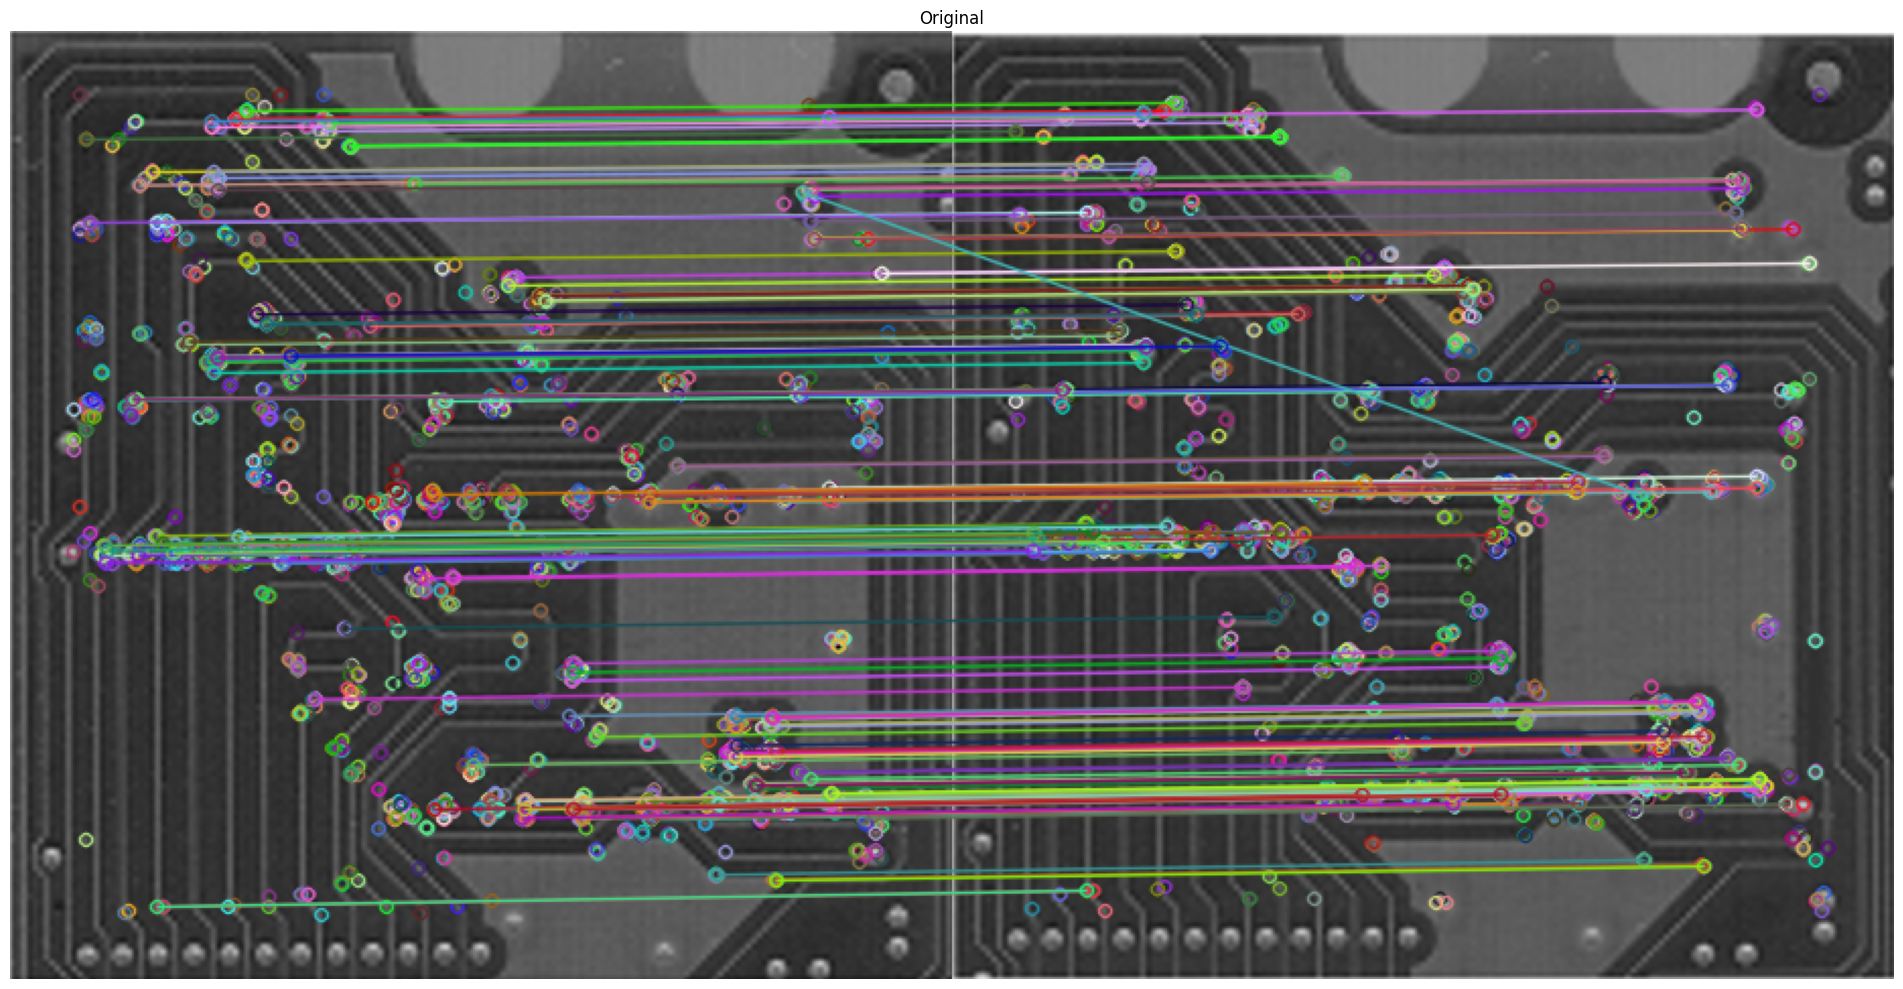

In [ ]:
# Draw top matches
imMatches = cv.drawMatches(img1, kp1, img2, kp2, matches, None)

plt.figure(figsize=(40,10))

plt.imshow(imMatches)
plt.title('Original')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Absolute difference
diff = cv.absdiff(img1, aligned_img2)

# Grayscale changes
diff_gray = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)


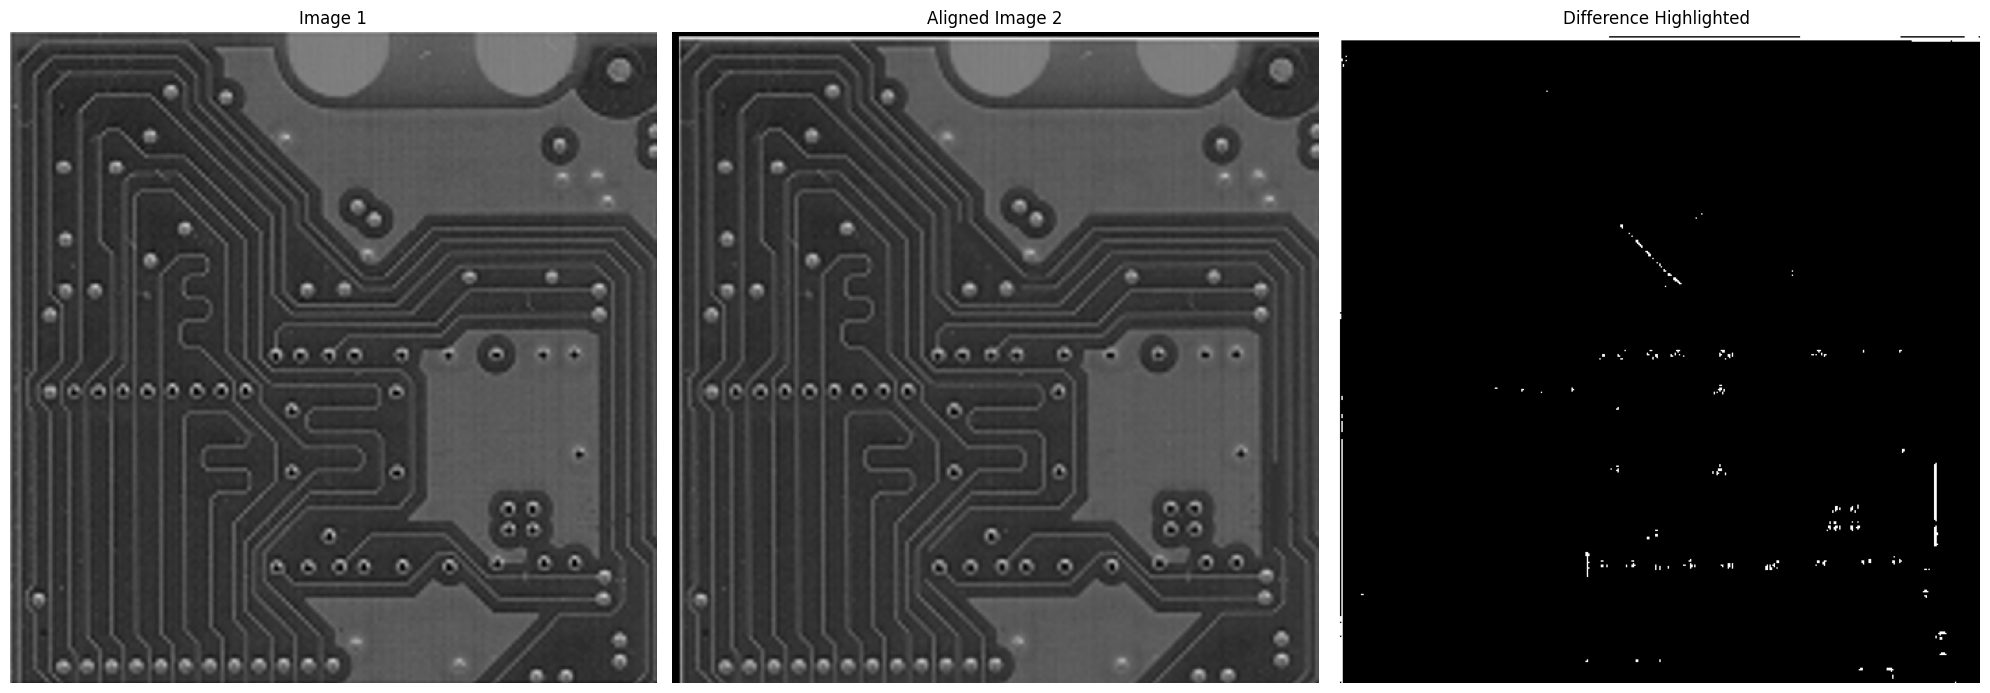

In [ ]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.title("Image 1")
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Aligned Image 2")
plt.imshow(cv.cvtColor(aligned_img2, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Difference Highlighted")
plt.imshow(diff_thresh, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
